In [1]:
import torch

### zi = 3*(xi + 2)^2

In [24]:
x = torch.ones([2,2], requires_grad=True) # will be calculated gradient
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [25]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [26]:
z = 3 * y**2
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


In [27]:
out = z.mean()
print(out)

tensor(27., grad_fn=<MeanBackward0>)


### change requires_grad

In [17]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)

False


In [18]:
a.requires_grad_(True) # change inplace

tensor([[-11.4490,  -4.0364],
        [  0.2407,  84.4357]], requires_grad=True)

In [19]:
b = (a*a).sum()
print(b.grad_fn)

In [20]:
with torch.no_grad():
    c = (a*a).sum() # no grad within with
print(c.requires_grad)

False


### calculate gradient

In [28]:
out.backward() # conduct back propagate, calculate dout/dx

In [29]:
x.grad # cumulative! if back propagated conducted twice, the grad will be twiced
# should set gradient to 0 before each time back propagation

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [36]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [37]:
x.data # get value only, no attributes such as requires_grad

tensor([[1., 1.],
        [1., 1.]])

In [39]:
a.numpy() # cannot use numpy() if requires_data = True

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [40]:
a.detach().numpy()

array([[-11.448992  ,  -4.0363703 ],
       [  0.24070679,  84.43568   ]], dtype=float32)

### linear regression

In [54]:
import numpy as np
from matplotlib import pyplot as plt

# 1. prepare data
x = torch.rand([50,1])
y = 3*x + 0.8

# 2. calculate y_pred
w = torch.rand([1,1], requires_grad = True) # initialize w and b
b = torch.tensor(0, requires_grad = True, dtype = torch.float32)
learning_rate = 0.01

# 4. use loop, conduct back propagate
for i in range(2000):
    # 3. calculate loss, put in the loop since losee is calculated before each back propagate
    y_pred = torch.matmul(x,w)+b
    loss = ((y - y_pred)**2).mean()
    
    if w.grad is not None: # make sure gradient is 0 before each back propagate
        w.data.zero_()
    if b.grad is not None:
        b.data.zero_()
        
    loss.backward() # conduct back propagate
    w.data = w.data - learning_rate*w.grad
    b.data = b.data - learning_rate*b.grad
    if i%100 == 0:
        print(f'w: {w.item()} b: {b.item()} loss: {loss}')

w: 0.7559311389923096 b: 0.03534650802612305 loss: 3.4357733726501465
w: 0.9497660398483276 b: 1.5347905158996582 loss: 0.2790176272392273
w: 1.2070114612579346 b: 1.5912095308303833 loss: 0.19726411998271942
w: 1.3867045640945435 b: 1.5256309509277344 loss: 0.16048797965049744
w: 1.54421067237854 b: 1.4560186862945557 loss: 0.13076169788837433
w: 1.6859631538391113 b: 1.3922501802444458 loss: 0.10654313862323761
w: 1.813880443572998 b: 1.334606409072876 loss: 0.08681007474660873
w: 1.9293427467346191 b: 1.2825663089752197 loss: 0.0707317441701889
w: 2.033564805984497 b: 1.2355916500091553 loss: 0.05763135850429535
w: 2.127640962600708 b: 1.1931893825531006 loss: 0.046957384794950485
w: 2.212559700012207 b: 1.1549150943756104 loss: 0.03826035559177399
w: 2.2892119884490967 b: 1.1203663349151611 loss: 0.03117409534752369
w: 2.358402729034424 b: 1.0891804695129395 loss: 0.02540026418864727
w: 2.4208579063415527 b: 1.0610307455062866 loss: 0.020695870742201805
w: 2.47723388671875 b: 1.035

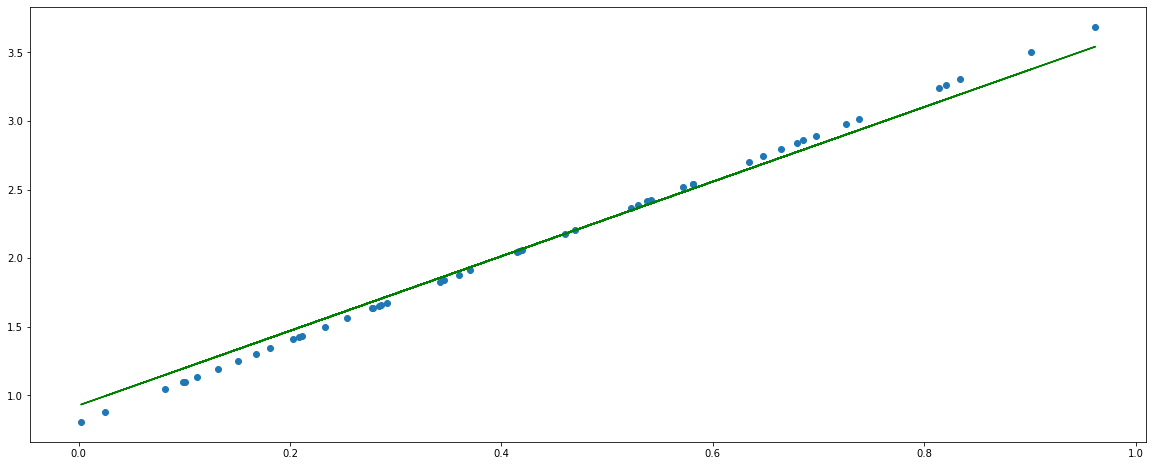

In [55]:
plt.figure(figsize=(20,8))
plt.scatter(x.numpy().reshape(-1), y.numpy().reshape(-1))
plt.plot(x.numpy().reshape(-1), y_pred.detach().numpy().reshape(-1), c='g')

In [56]:
w, b # 3, 0.8

(tensor([[2.7169]], requires_grad=True), tensor(0.9276, requires_grad=True))